In [1]:
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import illustris_python as il
from tqdm import tqdm
import h5py as hp5

In [2]:
# Pylinas core modules
import Pk_library as PKL
import MAS_library as MASL

In [3]:
from matplotlib import colors
from matplotlib import cm
from sctriangulate.colors import build_custom_continuous_cmap

In [3]:
baseUrl = 'http://www.illustris-project.org/api/'
headers = {"api-key": "10e80f2feaf19875ee764375e874499d"}

def get(path, params=None):
     # make HTTP GET request to path
     headers = {"api-key":"10e80f2feaf19875ee764375e874499d"}
     r = requests.get(path, params=params, headers=headers)

     # raise exception if response code is not HTTP SUCCESS (200)
     r.raise_for_status()

     if r.headers['content-type'] == 'application/json':
         return r.json() # parse json responses automatically

     if 'content-disposition' in r.headers:
         filename = r.headers['content-disposition'].split("filename=")[1]
         with open(filename, 'wb') as f:
             f.write(r.content)
         return filename # return the filename string

     return r
r = get(baseUrl)

In [4]:
r.keys()

dict_keys(['simulations'])

In [5]:
names = [r['simulations'][i]['name'] for i in range(len(r['simulations']))]
names

['Illustris-1',
 'Illustris-1-Dark',
 'Illustris-2',
 'Illustris-2-Dark',
 'Illustris-3',
 'Illustris-3-Dark',
 'TNG100-1',
 'TNG100-1-Dark',
 'TNG100-2',
 'TNG100-2-Dark',
 'TNG100-3',
 'TNG100-3-Dark',
 'TNG300-3',
 'TNG300-2-Dark',
 'TNG300-2',
 'TNG300-1-Dark',
 'TNG300-1',
 'TNG300-3-Dark',
 'TNG50-1',
 'TNG50-1-Dark',
 'TNG50-2',
 'TNG50-2-Dark',
 'TNG50-3',
 'TNG50-3-Dark',
 'TNG50-4',
 'TNG50-4-Dark',
 'Illustris-1-Subbox0',
 'Illustris-1-Subbox1',
 'Illustris-1-Subbox2',
 'Illustris-1-Subbox3',
 'Illustris-2-Subbox0',
 'Illustris-2-Subbox1',
 'Illustris-2-Subbox2',
 'Illustris-2-Subbox3',
 'Illustris-3-Subbox0',
 'Illustris-3-Subbox1',
 'Illustris-3-Subbox2',
 'Illustris-3-Subbox3',
 'TNG100-1-Subbox0',
 'TNG100-1-Subbox1',
 'TNG100-2-Subbox0',
 'TNG100-2-Subbox1',
 'TNG100-3-Subbox0',
 'TNG100-3-Subbox1',
 'TNG300-3-Subbox1',
 'TNG300-3-Subbox2',
 'TNG300-3-Subbox0',
 'TNG300-2-Subbox1',
 'TNG300-2-Subbox2',
 'TNG300-2-Subbox0',
 'TNG300-1-Subbox1',
 'TNG300-1-Subbox2',
 'TNG

In [6]:
# getting index of Illustris-3-Subbox-2
i = names.index('Illustris-3')
print('index=', i)

sim = get(r['simulations'][i]['url'])
sim.keys()

index= 4


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [8]:
# printing box size of simulatin and number of DM particles
print('box size:', sim['boxsize'])
print('number of DM particles:', sim['num_dm'])

box size: 75000.0
number of DM particles: 94196375


In [9]:
#getting the snapshot 
snaps = get(sim['snapshots'])

# snapshot at z=0
snap = snaps[-1]
snap

{'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_groups_subfind': 121209,
 'url': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/'}

In [10]:
# getting full metadata
meta = get(snap['url'])
meta

{'simulation': 'http://www.illustris-project.org/api/Illustris-3/',
 'number': 135,
 'redshift': 2.2204460492503099e-16,
 'num_gas': 87571556,
 'num_dm': 94196375,
 'num_trmc': 94196375,
 'num_stars': 4388167,
 'num_bhs': 33582,
 'num_groups_fof': 131727,
 'num_groups_subfind': 121209,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 23437820660.0,
 'filesize_groupcat': 114056740.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/',
 'subhalos': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.illustris-project.org/api/Illustris-3/snapshots/135/subhalos/plot.png?xQuant=mstar2_log&yQu

In [27]:
b_url = 'http://www.illustris-project.org/api/Illustris-3/'
sim_meta = get(b_url)
params = {'dm':'Coordinates'}

for i in tqdm(range(sim_meta['num_files_snapshot'])):
    file_url = b_url + "files/snapshot-135."+str(i)+".hdf5"
    saved_filename = get(file_url, params=params)

100%|██████████| 32/32 [04:57<00:00,  9.29s/it]


After downloading the data move the file to a new folder.
```
mkdir IL3
mv *.hdf5 IL3
```

# Now we will obtain data from the TNG Project

In [7]:
# getting index of Illustris-3-Subbox-2
i = names.index('TNG300-3')
print('index=', i)

sim = get(r['simulations'][i]['url'])
sim.keys()

index= 12


dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [8]:
# printing box size of simulation and number of DM particles
print('box size:', sim['boxsize'])
print('number of DM particles:', sim['num_dm'])

box size: 205000.0
number of DM particles: 244140625


In [9]:
#getting the snapshot 
snaps = get(sim['snapshots'])

# snapshot at z=0
snap = snaps[-1]
snap

{'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_groups_subfind': 391144,
 'url': 'http://www.illustris-project.org/api/TNG300-3/snapshots/99/'}

In [ ]:
# getting full metadata
meta = get(snap['url'])
meta

In [13]:
b_url = 'http://www.illustris-project.org/api/TNG300-3/'
sim_meta = get(b_url)
# params = {'dm':'Coordinates'} #coordinates of DM particles
params = {'bhs':'Coordinates,BH_Mass,Masses', 'stars':'Coordinates,Masses'}  #coordinates and mass of stars,black holes

print("Number of files:", sim_meta['num_files_snapshot'])
for i in tqdm(range(sim_meta['num_files_snapshot']), "Getting snapshots"):
    file_url = b_url + "files/snapshot-99."+str(i)+".hdf5"
    saved_filename = get(file_url, params=params)

Number of files: 16


Getting snapshots: 100%|██████████| 16/16 [01:36<00:00,  6.03s/it]


# Data analysis for Illustris data

Now we will do the data analysis.

## Plotting the DM particle distribution

In [7]:
# reading data hdf5 snapshots
basePath = "IL3/snap_135."

data = [[0,0,0]]

for i in tqdm(range(32), "Reading snapshots"):
    fileName = basePath + str(i) + ".hdf5"
    f = hp5.File(fileName, 'r')
    temp = f['PartType1/Coordinates'][:]
    data = np.append(data, temp, axis=0)
    f.close()

data = np.array(data[1:], dtype=np.float32)

100%|██████████| 32/32 [00:13<00:00,  2.33it/s]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


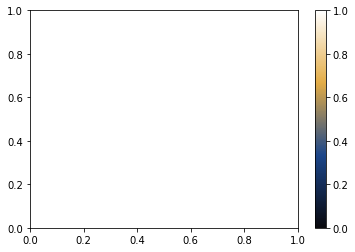

In [5]:
new_cmap = build_custom_continuous_cmap([9,9,14], [28, 70, 138], [227, 172, 70], [255,255,255])

# show the new colormap
fig,ax = plt.subplots()
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(),cmap=new_cmap),ax=ax)

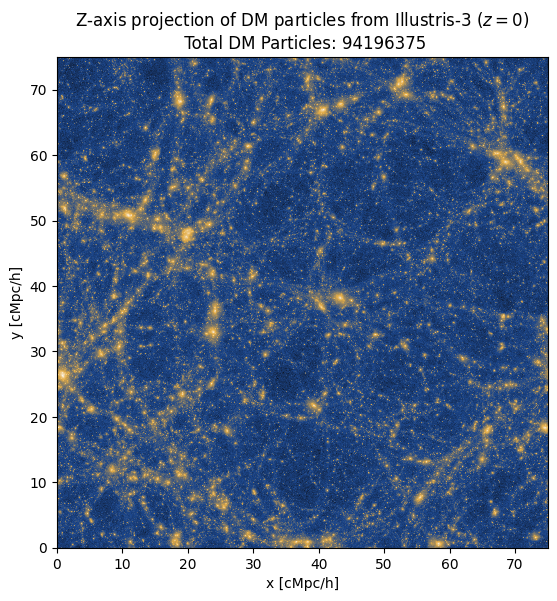

In [9]:
plt.figure(figsize=(6.5,6.5), dpi=100)
ax  = plt.gca()
ax.set_aspect('equal')
plt.hist2d(data[:,0]/1000, data[:,1]/1000, norm =colors.LogNorm(), cmap=new_cmap, bins=1024);
# plt.colorbar()

plt.title('Z-axis projection of DM particles from Illustris-3 ($z=0$)\n Total DM Particles: '+str(len(data)))


plt.xlabel('x [cMpc/h]')
plt.ylabel('y [cMpc/h]')


plt.savefig('FinalProducts/Illustris3_DM.jpg', dpi=300, bbox_inches='tight')

## Computing the 2 point correlation function

We need to compute the 2pCF using Corrfunc or Pylinas

### Computing the 2 point correlation function using Pylinas

In [14]:
grid = 512
BoxSize = 75
verbose = True
Np = len(data)
MAS = 'CIC'

pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0


Using CIC mass assignment scheme
Time taken = 3.134 seconds



In [15]:
# compute the correlation function
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


Computing correlation function of the field...
Time to complete loop = 0.82
Time taken = 4.64 seconds


In [16]:
# get the attributes
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes

In [17]:
# compute the correlation function
print("=====Computing Power Spectrum=====")
Pk    = PKL.Pk(delta, BoxSize,axis, MAS, threads)

# get the attributes
print("Getting attributes")
k      = Pk.k3D      #k in h/Mpc
Pk0    = Pk.Pk[:,0]  #power spectrum (monopole)

=====Computing Power Spectrum=====

Computing power spectrum of the field...
Time to complete loop = 5.14
Time taken = 5.74 seconds
Getting attributes


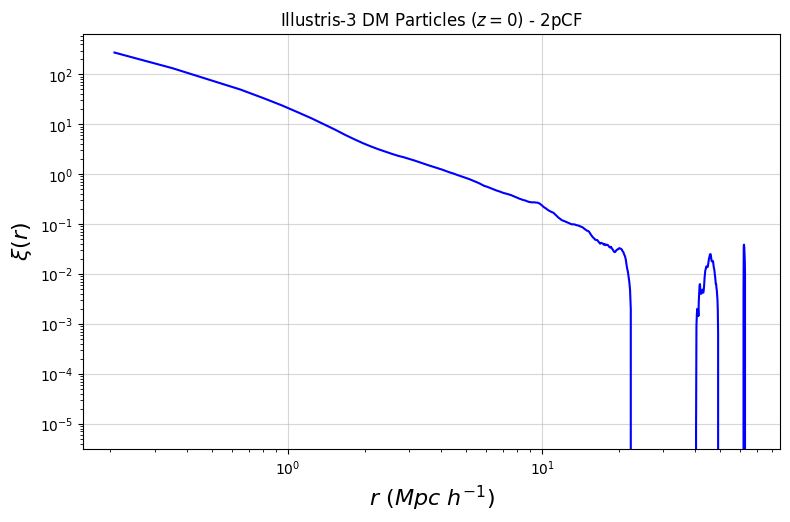

In [20]:
# log-log plot

plt.figure(figsize=(9,5.5), dpi=100)
plt.loglog(r, xi0, color='blue')
plt.grid(alpha=0.5)

plt.title('Illustris-3 DM Particles ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.savefig('FinalProducts/2pCF_Illustris3.jpg', dpi=300, bbox_inches='tight')

# Analysis for `TNG` data
We will plot the DM distibution from the Illustris project and then will compute the 2pCF

Since this is compute intensive, run this as a script rather than a notebook. The required script is `plot.py`

In [ ]:
# reading data hdf5 snapshots
basePath = "TNG300-3/snap_099."

data = [[0,0,0]]

for i in tqdm(range(16)):
    fileName = basePath + str(i) + ".hdf5"
    f = hp5.File(fileName, 'r')
    temp = np.array(f['PartType1/Coordinates'][:], dtype=np.float32)
    data = np.append(data, temp, axis=0)

In [ ]:
# plotting
plt.figure(figsize=(9,5.5), dpi=100)
plt.hist2d(data[:,0], data[:,1], norm =colors.LogNorm(), cmap=new_cmap, bins=2048);

plt.title('Z-axis projection of DM particles from TNG300-3 ($z=0$)\n Total DM Particles: '+str(len(data)))

plt.xlabel('x [c kpc/h]')
plt.ylabel('y [c kpc/h]')

plt.savefig('TNG300_DM.jpg', dpi=300, bbox_inches='tight')
plt.show()

## Computing 2pCF

In [ ]:
## computing xi(r)
grid = 512
BoxSize = 205
verbose = True
Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
pos = np.array(data/1000, dtype=np.float32)
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field")
MASL.MA(pos, delta, BoxSize, MAS, verbose=verbose)
delta /= np.mean(delta, dtype=np.float64);
delta -= 1.0

# compute the correlation function
print("=====Computing correlation function=====")
axis = 0
threads=12
CF     = PKL.Xi(delta, BoxSize, MAS, axis, threads)


# get the attributes
print("Getting attributes")
r      = CF.r3D      #radii in Mpc/h
xi0    = CF.xi[:,0]  #correlation function (monopole)
xi2    = CF.xi[:,1]  #correlation function (quadrupole)
xi4    = CF.xi[:,2]  #correlation function (hexadecapole)
Nmodes = CF.Nmodes3D #number of modes

In [ ]:
# compute the correlation function
print("=====Computing Power Spectrum=====")
Pk    = PKL.Pk(delta, BoxSize,axis, MAS, threads)

# get the attributes
print("Getting attributes")
k      = Pk.k3D      #k in h/Mpc
Pk0    = Pk.Pk[:,0]  #power spectrum (monopole)

In [ ]:
#getting only non-nan values for log(xi0) and log(pk0)
xi0_filtered = xi0[~np.isnan(np.log10(xi0))]
r_filterd    = r[~np.isnan(np.log10(xi0))]

Pk0_filtered = Pk0[~np.isnan(np.log10(Pk0))]
k_filtered   = k[~np.isnan(np.log10(Pk0))]

In [ ]:
# log-log plot
print("Plotting")
plt.figure(figsize=(9,5.5), dpi=100)
plt.loglog(r, xi0, color='blue')
plt.grid(alpha=0.5)

plt.title('TNG300-3 DM Particles ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.savefig('FinalProducts/2pCF_TNG300.jpg', dpi=300, bbox_inches='tight')
# plt.show()

# Data analysis for `TNG300-3` Star and BH data


## Reading Star and BHs Positions and Masses

In [4]:
# getting the positions of the group catalog from subfind
basepath = 'TNG300-3/Stars_BHs/snap_099.'

S_data = np.array([[0,0,0]], dtype=np.float32)
S_mass = np.array([0], dtype=np.float32)
BH_data = np.array([[0,0,0]], dtype=np.float32)
BH_mass = np.array([0], dtype=np.float32)
BH_mass1 = np.array([0], dtype=np.float32) #accretion reservoir mass

for i in tqdm(range(16), desc="Reading Star and BH data from Snapshots"):
    filename = basepath+str(i)+'.hdf5'
    f = hp5.File(filename, 'r')
    # Reading Star's data
    S_data = np.concatenate((S_data, f['PartType4/Coordinates'][:]), axis=0)
    S_mass = np.concatenate((S_mass, f['PartType4/Masses'][:]), axis=0)
    # Reading Blackhole's data
    BH_data = np.concatenate((BH_data, f['PartType5/Coordinates'][:]), axis=0)
    BH_mass = np.concatenate((BH_mass, f['PartType5/BH_Mass'][:]), axis=0)
    BH_mass1 = np.concatenate((BH_mass1, f['PartType5/Masses'][:]), axis=0)
    f.close()

# deleting the first row of the arrays
S_data = S_data[1:]
S_mass = S_mass[1:]
BH_data = BH_data[1:]
BH_mass = BH_mass[1:]
BH_mass1 = BH_mass1[1:]

Reading Star and BH data from Snapshots: 100%|██████████| 16/16 [00:04<00:00,  3.28it/s]


In [5]:
## computing xi(r)
print("====Computing 2pCF====")
grid = 256
BoxSize = 205
verbose = True
# Np = len(data)
MAS = 'CIC'

print("Getting position and delta array")
S_pos = np.array(S_data/1000, dtype=np.float32)
S_delta = np.zeros((grid,grid,grid), dtype=np.float32)
BH_pos = np.array(BH_data/1000, dtype=np.float32)
BH_delta = np.zeros((grid,grid,grid), dtype=np.float32)
BH_delta1 = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
print("Constructing 3D density field for Stars")
MASL.MA(S_pos, S_delta, BoxSize, MAS,W=S_mass, verbose=verbose)
S_delta /= np.mean(S_delta, dtype=np.float64);
S_delta -= 1.0
print("Constructing 3D density field for Blackholes with BH mass only")
MASL.MA(BH_pos, BH_delta, BoxSize, MAS,W=BH_mass, verbose=verbose)
BH_delta /= np.mean(BH_delta, dtype=np.float64);
BH_delta -= 1.0
print("Constructing 3D density field for Blackholes with BH mass only")
MASL.MA(BH_pos, BH_delta1, BoxSize, MAS,W=BH_mass1, verbose=verbose)
BH_delta1 /= np.mean(BH_delta1, dtype=np.float64);
BH_delta1 -= 1.0


# compute the correlation function
print("Computing correlation function")
axis = 0
threads=10
S_CF     = PKL.Xi(S_delta, BoxSize, MAS, axis, threads)
BH_CF    = PKL.Xi(BH_delta, BoxSize, MAS, axis, threads)
BH_CF1   = PKL.Xi(BH_delta1, BoxSize, MAS, axis, threads)

# get the attributes
print("Getting attributes for Stars")
S_r      = S_CF.r3D      #radii in Mpc/h
S_xi0    = S_CF.xi[:,0]  #correlation function (monopole)
S_xi2    = S_CF.xi[:,1]  #correlation function (quadrupole)
S_xi4    = S_CF.xi[:,2]  #correlation function (hexadecapole)
S_Nmodes = S_CF.Nmodes3D #number of modes
print("Getting attributes for Blackholes with BH mass only")
BH_r      = BH_CF.r3D      #radii in Mpc/h
BH_xi0    = BH_CF.xi[:,0]  #correlation function (monopole)
BH_xi2    = BH_CF.xi[:,1]  #correlation function (quadrupole)
BH_xi4    = BH_CF.xi[:,2]  #correlation function (hexadecapole)
BH_Nmodes = BH_CF.Nmodes3D #number of modes
print("Getting attributes for Blackholes with BH+reservoir mass")
BH_r1      = BH_CF1.r3D      #radii in Mpc/h
BH_xi0_1    = BH_CF1.xi[:,0]  #correlation function (monopole)
BH_xi2_1    = BH_CF1.xi[:,1]  #correlation function (quadrupole)
BH_xi4_1    = BH_CF1.xi[:,2]  #correlation function (hexadecapole)
BH_Nmodes_1 = BH_CF1.Nmodes3D #number of modes
print("\n\nDone!!\n")

====Computing 2pCF====
Getting position and delta array
Constructing 3D density field for Stars

Using CIC mass assignment scheme with weights
Time taken = 0.108 seconds

Constructing 3D density field for Blackholes with BH mass only

Using CIC mass assignment scheme with weights
Time taken = 0.064 seconds

Constructing 3D density field for Blackholes with BH mass only

Using CIC mass assignment scheme with weights
Time taken = 0.067 seconds

Computing correlation function

Computing correlation function of the field...
Time to complete loop = 0.10
Time taken = 0.59 seconds

Computing correlation function of the field...
Time to complete loop = 0.11
Time taken = 0.63 seconds

Computing correlation function of the field...
Time to complete loop = 0.10
Time taken = 0.59 seconds
Getting attributes for Stars
Getting attributes for Blackholes with BH mass only
Getting attributes for Blackholes with BH+reservoir mass


Done!!



In [6]:
## computing xi(r)
print("====Computing Power Spectrum====")

S_Pk   = PKL.Pk(S_delta, BoxSize, axis, MAS, threads)
BH_Pk  = PKL.Pk(BH_delta, BoxSize, axis, MAS, threads)
BH_Pk1 = PKL.Pk(BH_delta1, BoxSize, axis, MAS, threads)

# get the attributes
print("Getting attributes for Stars")
S_k      = S_Pk.k3D      #k in h/Mpc
S_Pk0    = S_Pk.Pk[:,0]  #P(k) (monopole)
print("Getting attributes for Blackholes with BH mass only")
BH_k     = BH_Pk.k3D      #k in h/Mpc
BH_Pk0   = BH_Pk.Pk[:,0]  #P(k) (monopole)
print("Getting attributes for Blackholes with BH mass + reservoir mass")
BH_k1    = BH_Pk1.k3D      #k in h/Mpc
BH_Pk0_1 = BH_Pk1.Pk[:,0]  #P(k) (monopole)

====Computing Power Spectrum====

Computing power spectrum of the field...
Time to complete loop = 0.64
Time taken = 0.72 seconds

Computing power spectrum of the field...
Time to complete loop = 0.65
Time taken = 0.72 seconds

Computing power spectrum of the field...
Time to complete loop = 0.64
Time taken = 0.72 seconds
Getting attributes for Stars
Getting attributes for Blackholes with BH mass only
Getting attributes for Blackholes with BH mass + reservoir mass


In [7]:
#getting only non-nan values for log(xi0) and log(Pk0)
S_xi0_filtered = S_xi0[~np.isnan(np.log10(S_xi0))]
S_r_filterd = S_r[~np.isnan(np.log10(S_xi0))]
BH_xi0_filtered = BH_xi0[~np.isnan(np.log10(BH_xi0))]
BH_r_filterd = BH_r[~np.isnan(np.log10(BH_xi0))]
BH_xi0_filtered1 = BH_xi0_1[~np.isnan(np.log10(BH_xi0_1))]
BH_r_filterd1 = BH_r1[~np.isnan(np.log10(BH_xi0_1))]

S_Pk0_filtered = S_Pk0[~np.isnan(np.log10(S_Pk0))]
S_k_filtered = S_k[~np.isnan(np.log10(S_Pk0))]
BH_Pk0_filtered = BH_Pk0[~np.isnan(np.log10(BH_Pk0))]
BH_k_filtered = BH_k[~np.isnan(np.log10(BH_Pk0))]
BH_Pk0_filtered1 = BH_Pk0_1[~np.isnan(np.log10(BH_Pk0_1))]
BH_k_filtered1 = BH_k1[~np.isnan(np.log10(BH_Pk0_1))]


/tmp/ipykernel_22871/3935568957.py:2: RuntimeWarning: invalid value encountered in log10
  S_xi0_filtered = S_xi0[~np.isnan(np.log10(S_xi0))]
/tmp/ipykernel_22871/3935568957.py:3: RuntimeWarning: invalid value encountered in log10
  S_r_filterd = S_r[~np.isnan(np.log10(S_xi0))]
/tmp/ipykernel_22871/3935568957.py:4: RuntimeWarning: invalid value encountered in log10
  BH_xi0_filtered = BH_xi0[~np.isnan(np.log10(BH_xi0))]
/tmp/ipykernel_22871/3935568957.py:5: RuntimeWarning: invalid value encountered in log10
  BH_r_filterd = BH_r[~np.isnan(np.log10(BH_xi0))]
/tmp/ipykernel_22871/3935568957.py:6: RuntimeWarning: invalid value encountered in log10
  BH_xi0_filtered1 = BH_xi0_1[~np.isnan(np.log10(BH_xi0_1))]
/tmp/ipykernel_22871/3935568957.py:7: RuntimeWarning: invalid value encountered in log10
  BH_r_filterd1 = BH_r1[~np.isnan(np.log10(BH_xi0_1))]


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


Plotting 2pCF


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


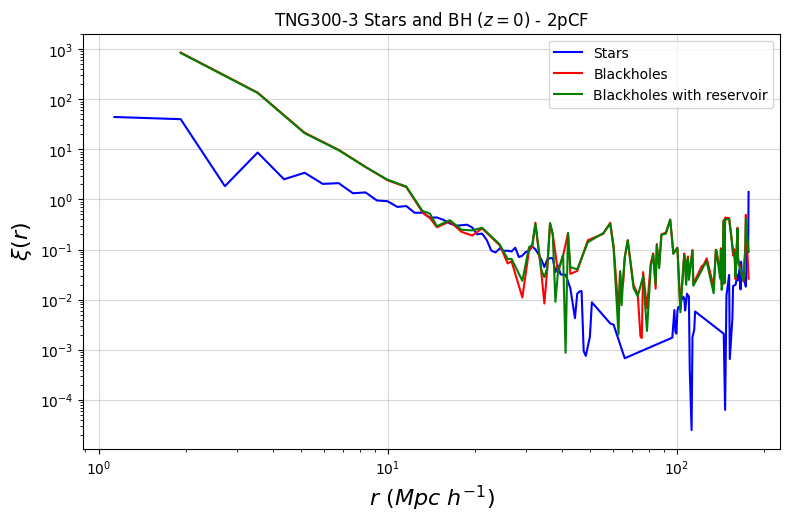

In [8]:
# log-log plot of 2pCF
print("Plotting 2pCF")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(S_r_filterd,S_xi0_filtered, color='blue', label='Stars')
plt.plot(BH_r_filterd,BH_xi0_filtered, color='red', label='Blackholes')
plt.plot(BH_r_filterd1,BH_xi0_filtered1, color='green', label='Blackholes with reservoir')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.title('TNG300-3 Stars and BH ($z=0$) - 2pCF')
plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.legend()

plt.savefig('FinalProducts/2pCF_TNG300-3_Stars_BH.jpg', dpi=300, bbox_inches='tight')
plt.show()

Plotting ratio between BH_xi0 and BH_xi0_1


Text(0, 0.5, "Ratio of $\\xi(r)$ 's")

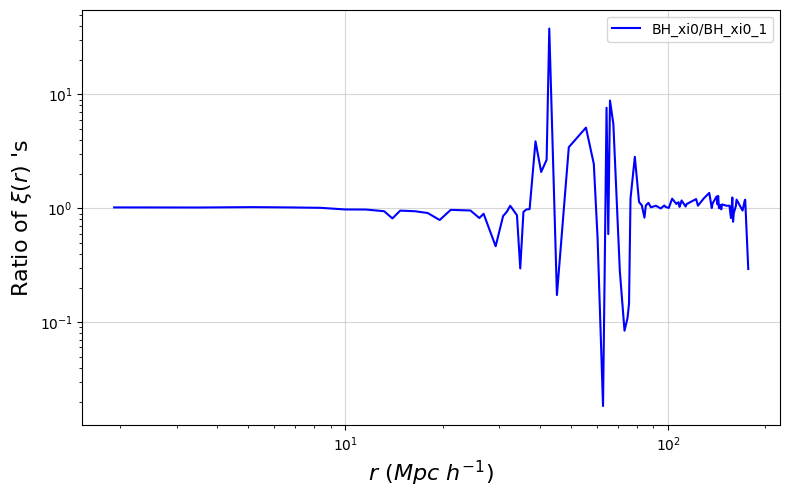

In [9]:
# plotting the ratio between the two BH_xi0 and BH_xi0_1
print("Plotting ratio between BH_xi0 and BH_xi0_1")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(BH_r_filterd,BH_xi0_filtered/BH_xi0_filtered1, color='blue', label='BH_xi0/BH_xi0_1')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.legend()

plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("Ratio of $\\xi(r)$ 's", fontsize=16)

Clearly we can see that 2pCF of BH with and without Reservior mass is almost similar. So for further analysis we will use the 2pCF of BHs without the Reservior mass.

Plotting Pk


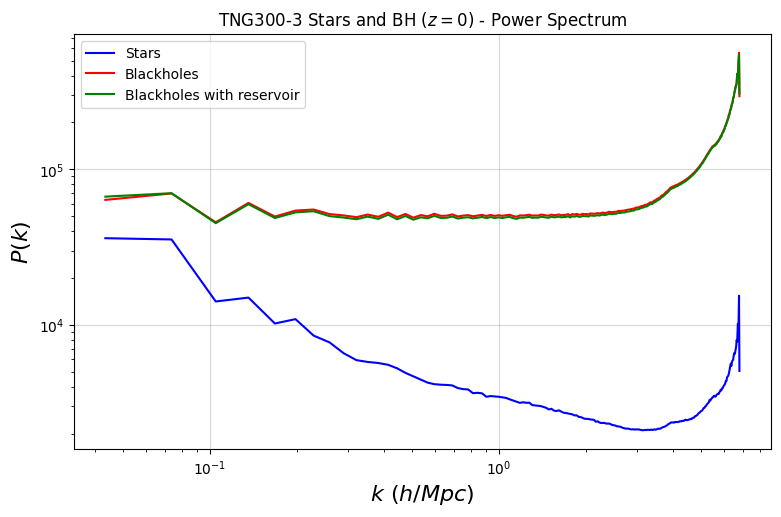

In [11]:
# log-log plot of Pk
print("Plotting Pk")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(S_k_filtered,S_Pk0_filtered, color='blue', label='Stars')
plt.plot(BH_k_filtered,BH_Pk0_filtered, color='red', label='Blackholes')
plt.plot(BH_k_filtered1,BH_Pk0_filtered1, color='green', label='Blackholes with reservoir')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)
plt.legend()

plt.xlabel('$k ~(h/Mpc)$',  fontsize=16)
plt.ylabel("$P(k)$", fontsize=16)
plt.title('TNG300-3 Stars and BH ($z=0$) - Power Spectrum')

plt.savefig('FinalProducts/Pk_TNG300-3_Stars_BH.jpg', dpi=300, bbox_inches='tight')

In [10]:
# Saving the data to the HDf5 file FinalProducts/2pCF_TNG.hdf5

print("Saving the data to the HDf5 file FinalProducts/2pCF_TNG.hdf5")
h5f = hp5.File('FinalProducts/2pCF_TNG.hdf5', 'a') 

Saving the data to the HDf5 file FinalProducts/2pCF_TNG.hdf5


<KeysViewHDF5 ['TNG300-3']>

In [12]:
main_grp = h5f["TNG300-3"]

grp1 = main_grp.create_group('Stars')
grp2 = main_grp.create_group('BH')

dset1 = grp1.create_dataset('r', data=S_r_filterd)
dset2 = grp1.create_dataset('xi0', data=S_xi0_filtered)
dset1 = grp2.create_dataset('r', data=BH_r_filterd)
dset2 = grp2.create_dataset('xi0', data=BH_xi0_filtered)

main_grp.keys()
h5f.close()
print("\n\nDone!!\n")



Done!!



In [29]:
print("Saving the data to the HDf5 file FinalProducts/Pk_TNG.hdf5")
h5f = hp5.File('FinalProducts/Pk_TNG.hdf5', 'a')
main_grp = h5f["TNG300-3"] 
grp1 = main_grp.create_group('Stars')
grp2 = main_grp.create_group('BH')

dset1 = grp1.create_dataset('k', data=S_k_filtered)
dset2 = grp1.create_dataset('Pk0', data=S_Pk0_filtered)
dset1 = grp2.create_dataset('k', data=BH_k_filtered)
dset2 = grp2.create_dataset('Pk0', data=BH_Pk0_filtered)
print(main_grp.keys())
h5f.close()
print("\n\nDone!!\n")

Saving the data to the HDf5 file FinalProducts/Pk_TNG.hdf5
<KeysViewHDF5 ['BH', 'DM', 'FoF_halos', 'Stars', 'Subfind_Subhalos']>


Done!!



Now we will plot all the 2pCF together to compare different tracers.

In [24]:
# Reading 2pCF data from the HDf5 file FinalProducts/2pCF_TNG.hdf5

h5f = hp5.File('FinalProducts/2pCF_TNG.hdf5', 'r')

# reading full scale data
R = h5f['TNG300-3/DM/r'][:]
xi0 = h5f['TNG300-3/DM/xi0'][:]
# Reading data for Stars
R_S = h5f['TNG300-3/Stars/r'][:]
xi0_S = h5f['TNG300-3/Stars/xi0'][:]
# Reading data for BH
R_BH = h5f['TNG300-3/BH/r'][:]
xi0_BH = h5f['TNG300-3/BH/xi0'][:]
# Reding FoF data
R_FoF = h5f['TNG300-3/FoF_halos/r'][:]
xi0_FoF = h5f['TNG300-3/FoF_halos/xi0'][:]
# Reading Subfind Subhalos data
R_Subfind = h5f['TNG300-3/Subfind_Subhalos/r'][:]
xi0_Subfind = h5f['TNG300-3/Subfind_Subhalos/xi0'][:]

h5f.close()

Plotting the above data


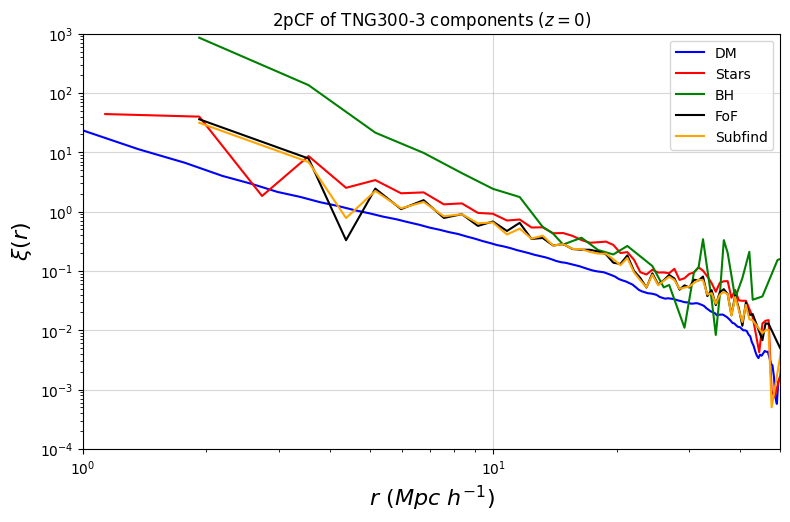

In [23]:
# plotting the above data
print("Plotting the above data")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(R,xi0, color='blue', label='DM')
plt.plot(R_S,xi0_S, color='red', label='Stars')
plt.plot(R_BH,xi0_BH, color='green', label='BH')
plt.plot(R_FoF,xi0_FoF, color='black', label='FoF')
plt.plot(R_Subfind,xi0_Subfind, color='orange', label='Subfind')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.legend()

plt.xlim(1, 50)
plt.ylim(1e-4, 1e3)
plt.title('2pCF of TNG300-3 components ($z=0$)')

plt.xlabel('$r ~(Mpc~h^{-1})$',  fontsize=16)
plt.ylabel("$\\xi(r)$", fontsize=16)

plt.savefig('FinalProducts/2pCF_TNG300-3_components.jpg', dpi=300, bbox_inches='tight')


In [30]:
# Reading Pk data from the HDf5 file FinalProducts/Pk_TNG.hdf5
h5f = hp5.File('FinalProducts/Pk_TNG.hdf5', 'r')
# reading full scale data
K = h5f['TNG300-3/DM/k'][:]
Pk0 = h5f['TNG300-3/DM/Pk0'][:]
# Reading data for Stars
K_S = h5f['TNG300-3/Stars/k'][:]
Pk0_S = h5f['TNG300-3/Stars/Pk0'][:]
# Reading data for BH
K_BH = h5f['TNG300-3/BH/k'][:]
Pk0_BH = h5f['TNG300-3/BH/Pk0'][:]
# Reding FoF data
K_FoF = h5f['TNG300-3/FoF_halos/k'][:]
Pk0_FoF = h5f['TNG300-3/FoF_halos/Pk0'][:]
# Reading Subfind Subhalos data
K_Subfind = h5f['TNG300-3/Subfind_Subhalos/k'][:]
Pk0_Subfind = h5f['TNG300-3/Subfind_Subhalos/Pk0'][:]

h5f.close()

Plotting the above data


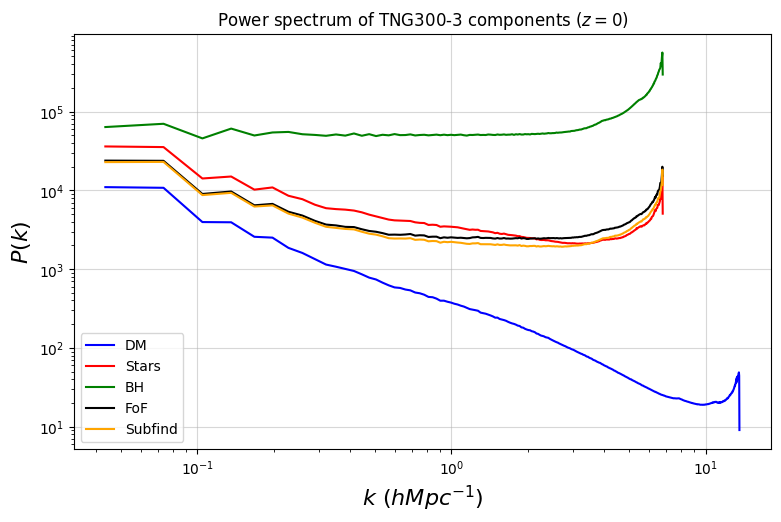

In [31]:
# plotting the above data
print("Plotting the above data")
plt.figure(figsize=(9,5.5), dpi=100)
plt.plot(K,Pk0, color='blue', label='DM')
plt.plot(K_S,Pk0_S, color='red', label='Stars')
plt.plot(K_BH,Pk0_BH, color='green', label='BH')
plt.plot(K_FoF,Pk0_FoF, color='black', label='FoF')
plt.plot(K_Subfind,Pk0_Subfind, color='orange', label='Subfind')
plt.xscale('log')
plt.yscale('log')
plt.grid(alpha=0.5)

plt.legend()

plt.xlabel('$k ~(h Mpc^{-1})$',  fontsize=16)
plt.ylabel("$P(k)$", fontsize=16)
plt.title('Power spectrum of TNG300-3 components ($z=0$)')

plt.savefig('FinalProducts/Pk_TNG300-3_components.jpg', dpi=300, bbox_inches='tight')